In [1]:
%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import table
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
engine = create_engine("sqlite:///Database/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# Get measurements and stations
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
session = Session(engine)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<AxesSubplot:xlabel='date'>

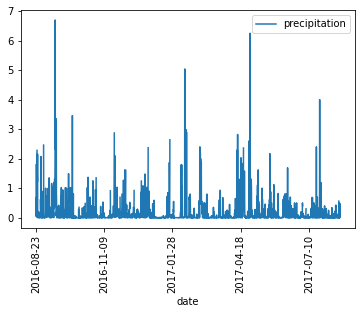

In [6]:
# Check last 12 months of precipitation data and plot the results. 

# Date one year from the last entry
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Retrieve data and precipitation and put into dataframe
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
last_year_prcp = pd.DataFrame(results, columns=['date', 'precipitation'])
last_year_prcp.set_index('date', inplace=True)
# Sort dataframe by date
last_year_prcp = last_year_prcp.sort_values("date")
last_year_prcp = last_year_prcp.sort_index()

# Statistical summary
display(last_year_prcp.describe())

# View data
last_year_prcp.plot(rot=90)

,avg_prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


<AxesSubplot:xlabel='date'>

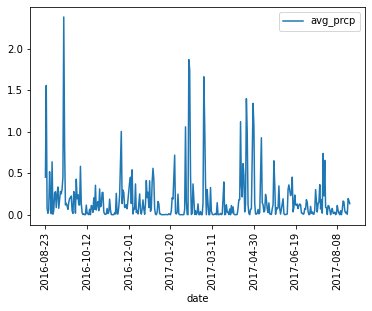

In [7]:
# Check average precipitation
avg_prcp = pd.DataFrame(results, columns=['date', 'avg_prcp']).dropna()
avg_prcp = avg_prcp.groupby(by='date').mean().sort_index()

# Statistical summary
display(avg_prcp.describe())

# View data
avg_prcp.plot(rot=90)

,date,june temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


,june temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:xlabel='date'>

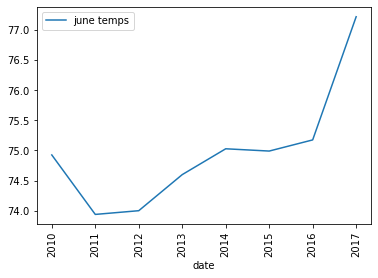

In [40]:
# Looking at June
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

# Get list of june temps and make datafame
june_temps_list = [(temp.date, temp.tobs) for temp in june_temps]
june_temps_df = pd.DataFrame(june_temps_list, columns=['date', 'june temps'])
june_temps_df['date'] = pd.to_datetime(june_temps_df['date'])
june_temps = june_temps_df.copy()
june_temps.set_index('date', inplace=True)
display(june_temps_df)
# Stistical Summary
display(june_temps_df.describe())

# Find daily average
june_avg_temp_df = june_temps_df.groupby(by=june_temps_df['date'].dt.year).mean().sort_index()

# View data
june_avg_temp_df.plot(rot=90)

,date,december temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


,december temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

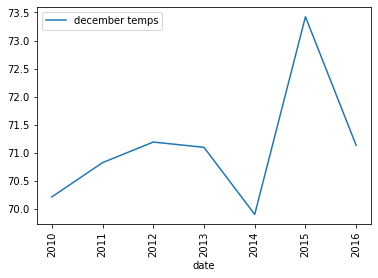

In [41]:
# Looking at June
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

# Get list of june temps and make datafame
dec_temps_list = [(temp.date, temp.tobs) for temp in dec_temps]
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['date', 'december temps'])
dec_temps_df['date'] = pd.to_datetime(dec_temps_df['date'])
dec_temps = dec_temps_df.copy()
dec_temps.set_index('date', inplace=True)
display(dec_temps_df)
# Stistical Summary
display(dec_temps_df.describe())

# Find daily average
dec_avg_temp_df = dec_temps_df.groupby(by=dec_temps_df['date'].dt.year).mean().sort_index()

# View data
dec_avg_temp_df.plot(rot=90)

In [64]:
# Station analysis
station_count = session.query(func.count(Station.station)).all()
print(f"Number of stations: {station_count}")

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Move active stations: {station_activity}")

    # Lowest temperature recorded, highest temperature recorded, average temperature of most active station
most_active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"""USC00519281 Analysis:
Lowest Temp: {round(most_active_station_temps[0][0], 2)}
Highest Temp: {round(most_active_station_temps[0][1], 2)}
Average Temp: {round(most_active_station_temps[0][2], 2)}
""")

Number of stations: [(9,)]
Move active stations: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281 Analysis:
Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66



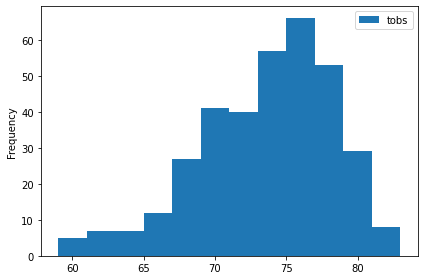

In [65]:
# Last 12 months temps of most active station
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
mas_temps = pd.DataFrame(results, columns=['tobs'])
mas_temps.plot.hist(bins=12)
plt.tight_layout()

In [15]:
# Function to check data between two dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
